## **SKIN CANCER PROJECT**




# Introduction:
### Problem


> The goal of this project is to develop a machine learning model capable of recognizing skin cancer, with a focus on addressing its impact on the population of Kazakhstan. Skin cancer is a growing concern globally, and early detection is crucial for effective treatment. This model aims to provide a reliable and accessible tool for preliminary skin cancer screening.



**My work demonstrate how by using Tensorflow and advanced CNN architecture like EfficientNet-B4 build a powerful model which recognize a skin cancer diagnoses.**

# Data and Methods
The dataset for this project is sourced from the International Skin Imaging Collaboration (ISIC), specifically the ISIC Challenge. This dataset is renowned for its extensive collection of skin lesion images, encompassing various skin types, conditions, and lesions, making it invaluable for training and validating machine learning models for skin cancer recognition.

The ISIC Challenge dataset includes:

Training Data: Consists of 25,331 JPEG images of skin lesions, along with corresponding ground truth annotations for lesion diagnoses.
Test Data: Comprises 8,238 JPEG images of skin lesions.


 The result will be  accessible web-based diagnostic tool that exemplifies the intersection of technology and healthcare for early cancer detection.

Datasets:

1. **ISIC_2019_Training_Input** - training dataset

2. **ISIC_2019_Test_Input** - test dataset, but I didn't use it because testdataset metadata has no diagnoses. Of course, unsupervised learning could be used, but I wanted classification. Because of this, I have divided training into a train set and validation set by 80/20

3. **ISIC_2019_Training_GroundTruth.csv** - metadata where all diagnoses and id image are located: image, MEL, NV, BCC, AK, BKL, DF, VASC, SCC, UNK.


4. **ISIC_2019_Training_Metadata.csv** - used for skin lesion analysis: image, age_approx, anatom_site_general, lesion_id, sex

Diagnosis(8 classes and UNK(Unknown)):
1) MEL (Melanoma): Malignant

2) NV (Nevus): Benign

3) BCC (Basal Cell Carcinoma): Malignant

4) AK (Actinic Keratosis): Precancerous

5) BKL (Benign Keratosis-Like Lesions): Benign

6) DF (Dermatofibroma): Benign

7) VASC (Vascular Lesions): Benign

8) SCC (Squamous Cell Carcinoma): Malignant

9) UNK (Unknown): Unclassified


Benign refers to a condition, tumor, or growth that is not cancerous. It doesn't spread to other parts of the body and is generally less serious than malignant conditions.


Malignant refers to cancerous growths or tumors. These can spread to other parts of the body, invade nearby tissues, and are potentially life-threatening if not treated effectively.

# Description of the Machine Learning (ML) Model
For skin cancer recognition, the project Iuse the EfficientNet-B4 architecture, a best convolutional neural network (CNN) known for its efficiency and accuracy in image classification tasks. This model is implemented using TensorFlow and Keras because it is was learned on lessons.

EfficientNetB4 is a modern type of neural network specifically designed for image recognition tasks. It belongs to the EfficientNet family, which is a series of models known for their efficiency and effectiveness in handling images. What makes EfficientNetB4 particularly impressive is its ability to achieve high accuracy in recognizing and classifying images while using fewer computational resources compared to other models. This balance between performance and efficiency is what makes it stand out.

In myproject, integrating EfficientNetB4 is a strategic choice for several reasons:

Pre-Trained on a Large Dataset: EfficientNetB4 has been trained on 'ImageNet', a massive database of images. This pre-training means it has already learned to identify a wide variety of features in images, which can be beneficial for myproject.

High Accuracy with Lower Resources: Due to its efficient design, EfficientNetB4 can process and understand images with a high level of accuracy without needing extensive computational power. This is particularly advantageous if working with limited resources or need to process a large number of images quickly.

Adaptability: This adaptability allows to leverage the powerful base of EfficientNetB4 while fine-tuning the model for my unique dataset and objectives.

In summary, EfficientNetB4 brings a powerful, efficient, and adaptable solution to myproject, enabling accurate image recognition and classification without the need for heavy computational resources. This aligns with modern trends in AI and machine learning, where efficiency and accuracy are key.

  
  


# Results
I trained model with loss: 1.0261 - accuracy: 0.6337
After tuning the model performance increased to loss: loss: 0.9923 - accuracy: 0.6483



In this research, I set out to develop an efficient deep learning model for the detection of skin cancer diagnoses using the state-of-the-art EfficientNetB4 architecture. The model exhibited promising performance during training, achieving an impressive accuracy on the training set.

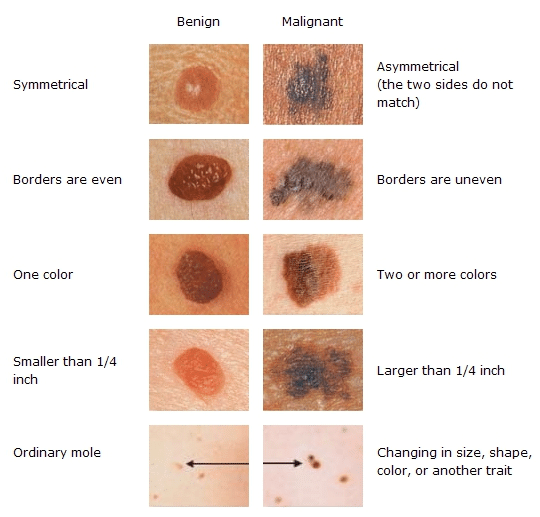

# Importing ISIC 2019 dataset and metadata

In [1]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Input.zip

--2024-04-15 14:10:09--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.195.249, 52.217.139.161, 52.217.133.177, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|54.231.195.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9771618190 (9.1G) [application/zip]
Saving to: ‘ISIC_2019_Training_Input.zip’

ISIC_2019_Training_ 100%[===================>]   9.10G  45.8MB/s    in 4m 6s   

2024-04-15 14:14:16 (37.8 MB/s) - ‘ISIC_2019_Training_Input.zip’ saved [9771618190/9771618190]



In [2]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_Input.zip

--2024-04-15 14:15:31--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.137.73, 16.182.70.225, 52.217.195.241, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|54.231.137.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3823247963 (3.6G) [application/zip]
Saving to: ‘ISIC_2019_Test_Input.zip’

ISIC_2019_Test_Inpu 100%[===================>]   3.56G  20.6MB/s    in 86s     

2024-04-15 14:16:58 (42.3 MB/s) - ‘ISIC_2019_Test_Input.zip’ saved [3823247963/3823247963]



In [3]:
!unzip ISIC_2019_Training_Input.zip -d ./

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: ./ISIC_2019_Training_Input/ISIC_0065357.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065358.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065359.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065360.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065361.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065362.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065366.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065367.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065368.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065370.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065371.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065372.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065374.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065376.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_0065377.jpg  
  inflating: ./ISIC_2019_Training_Input/ISIC_00

In [4]:
!unzip ISIC_2019_Test_Input.zip -d ./

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: ./ISIC_2019_Test_Input/ISIC_0057952.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057954.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057955.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057956.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057957.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057961.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057965.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057967.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057968.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057971.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057972.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057976.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057981.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057982.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057983.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057991.jpg  
  inflating: ./ISIC_2019_Test_Input/ISIC_0057992.jpg

In [5]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv

--2024-04-15 14:21:57--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.172.105, 52.216.201.27, 54.231.228.217, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|54.231.172.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1291479 (1.2M) [text/csv]
Saving to: ‘ISIC_2019_Training_GroundTruth.csv’

ISIC_2019_Training_ 100%[===================>]   1.23M  3.31MB/s    in 0.4s    

2024-04-15 14:21:57 (3.31 MB/s) - ‘ISIC_2019_Training_GroundTruth.csv’ saved [1291479/1291479]



In [6]:
!wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Metadata.csv

--2024-04-15 14:22:07--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Metadata.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.57.121, 52.217.233.241, 54.231.129.169, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.57.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1214351 (1.2M) [text/csv]
Saving to: ‘ISIC_2019_Training_Metadata.csv’

ISIC_2019_Training_ 100%[===================>]   1.16M  3.09MB/s    in 0.4s    

2024-04-15 14:22:07 (3.09 MB/s) - ‘ISIC_2019_Training_Metadata.csv’ saved [1214351/1214351]





---



# **STEP** **1 Understand and visualize the dataset, including the images and their metadata**

Image Count in Training and Test Directories







In [7]:
import os

training_input_path1 = '/content/ISIC_2019_Training_Input'
test_input_path1 = '/content/ISIC_2019_Test_Input'

training_image_count1 = len([name for name in os.listdir(training_input_path1) if os.path.isfile(os.path.join(training_input_path1, name))])
test_image_count1 = len([name for name in os.listdir(test_input_path1) if os.path.isfile(os.path.join(test_input_path1, name))])

print(f'Number of images in training input: {training_image_count1}')
print(f'Number of images in test input: {test_image_count1}')


Number of images in training input: 25333
Number of images in test input: 8240


Data Loading and Preview

In [8]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing import image

training_input_path = '/content/ISIC_2019_Training_Input'
training_metadata_path = '/content/ISIC_2019_Training_Metadata.csv'
training_ground_truth_path = '/content/ISIC_2019_Training_GroundTruth.csv'

training_metadata = pd.read_csv(training_metadata_path)
training_ground_truth = pd.read_csv(training_ground_truth_path)

print(training_metadata.head())
print(training_ground_truth.head())

          image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male
          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0


Skin Lesion Images Visualization with Metadata

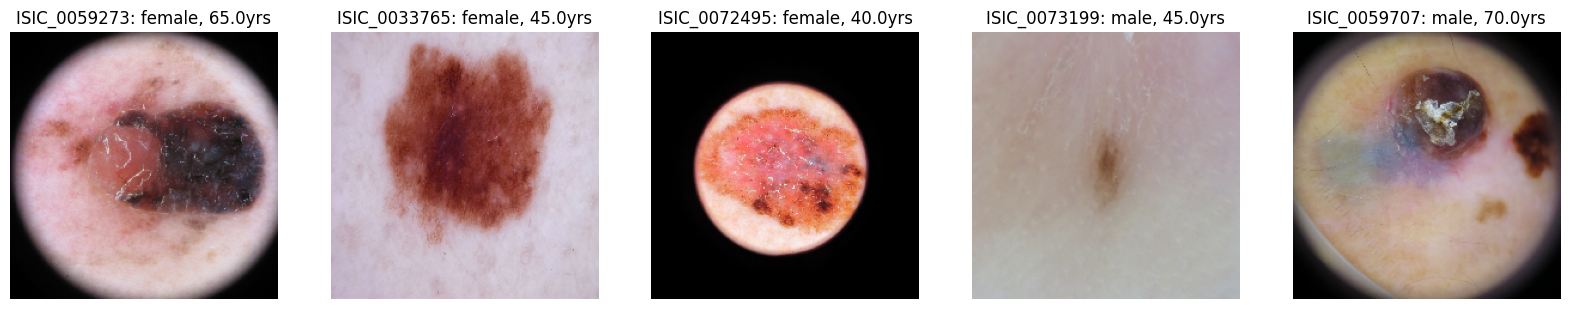

In [9]:
def visualize_images(images_folder, metadata_df, num_images=5):
    sample_images = random.sample(os.listdir(images_folder), num_images)
    plt.figure(figsize=(20, 10))
    for i, image_name in enumerate(sample_images):
        img_path = os.path.join(images_folder, image_name)
        img = image.load_img(img_path, target_size=(224, 224))
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')

        base_name = os.path.splitext(image_name)[0]

        img_metadata = metadata_df[metadata_df['image'] == base_name]
        if not img_metadata.empty:
            plt.title(f"{base_name}: {img_metadata.iloc[0]['sex']}, {img_metadata.iloc[0]['age_approx']}yrs")
        else:
            plt.title(f"{base_name}: Metadata not found")

    plt.show()

visualize_images(training_input_path, training_metadata)

Statistical distributions of age, anatomical site, and sex from the training metadata

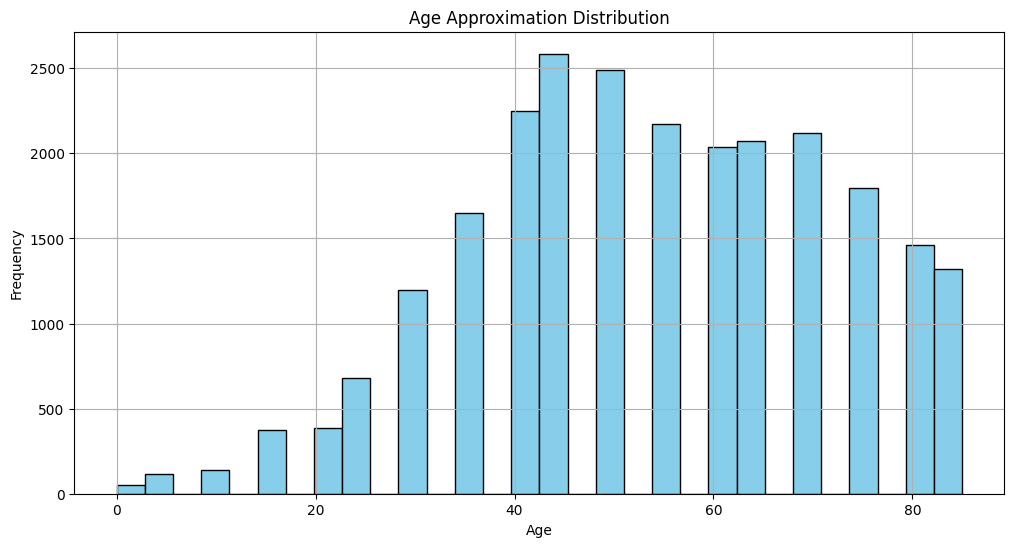

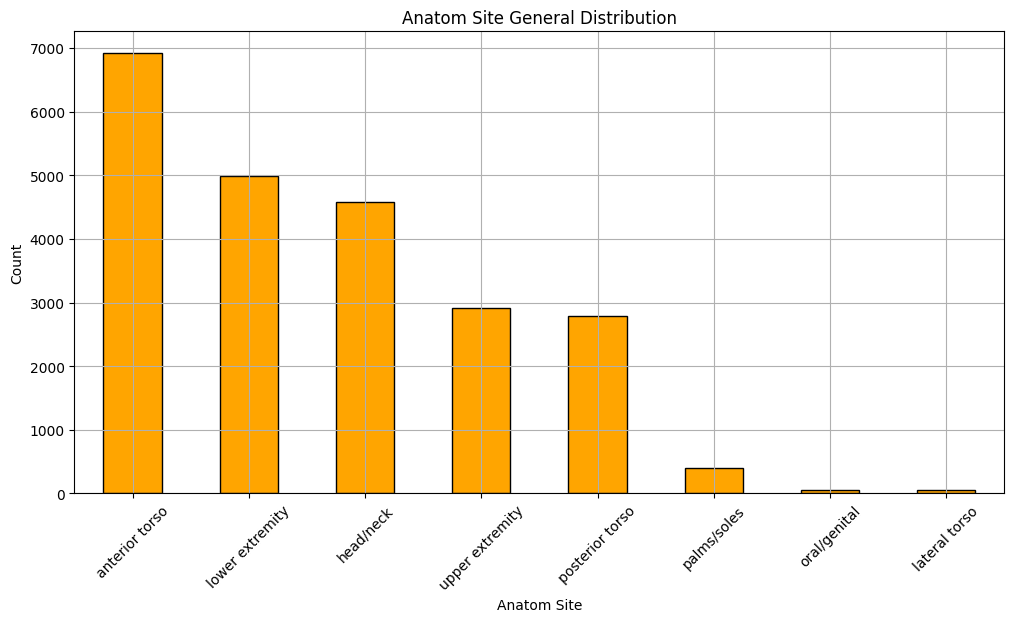

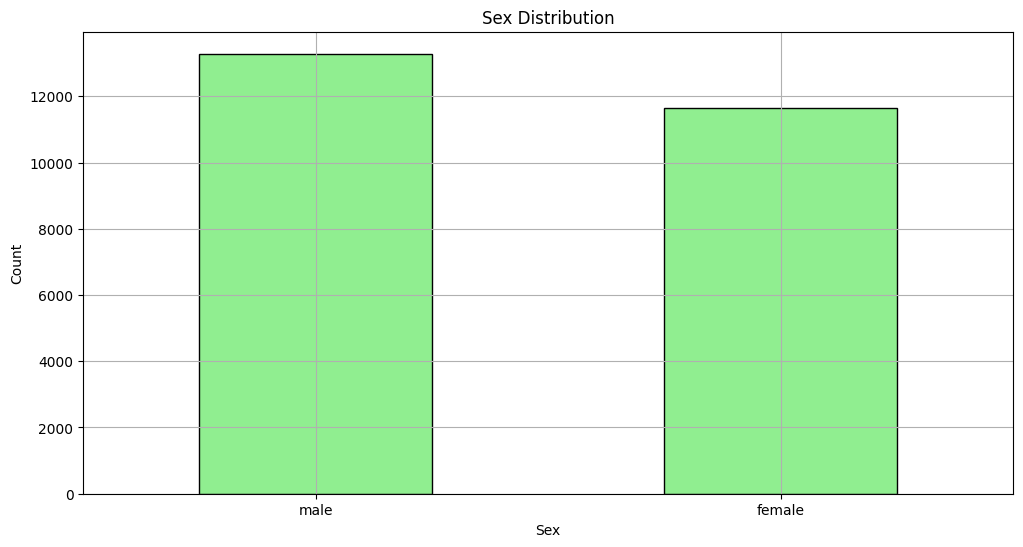

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(training_metadata['age_approx'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Approximation Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
training_metadata['anatom_site_general'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Anatom Site General Distribution')
plt.xlabel('Anatom Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
training_metadata['sex'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Patients' ages within each diagnosis category.


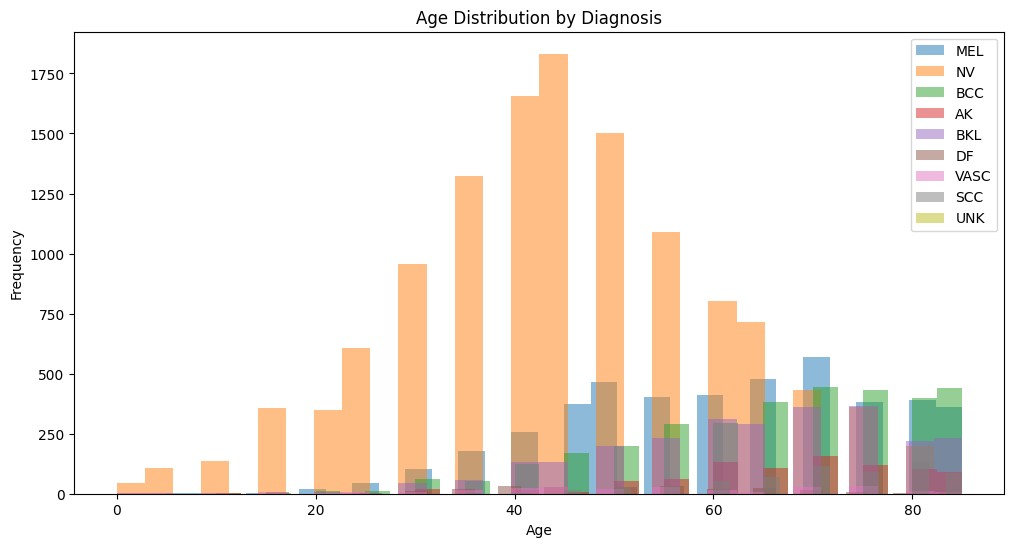

In [15]:
plt.figure(figsize=(12, 6))
for diagnosis in training_ground_truth.columns[1:]:
    subset = training_metadata[training_metadata['image'].isin(training_ground_truth[training_ground_truth[diagnosis] == 1]['image'])]
    plt.hist(subset['age_approx'].dropna(), bins=30, alpha=0.5, label=diagnosis)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Diagnosis')
plt.legend()
plt.show()


Frequency of lesions on different parts of the body


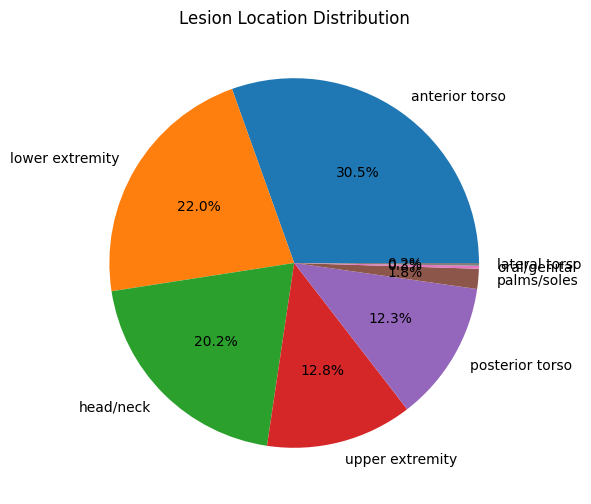

In [16]:
plt.figure(figsize=(12, 6))
training_metadata['anatom_site_general'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Lesion Location Distribution')
plt.ylabel('')
plt.show()



---



# **STEP** **2: Data Preprocessing and Preparation**




Load and merge the metadata and ground truth


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

metadata_path = '/content/ISIC_2019_Training_Metadata.csv'
ground_truth_path = '/content/ISIC_2019_Training_GroundTruth.csv'
metadata = pd.read_csv(metadata_path)
ground_truth = pd.read_csv(ground_truth_path)
full_data = pd.merge(metadata, ground_truth, on='image')

Appending Image Extensions and Filtering 'UNK' Rows

In [18]:
full_data['image'] = full_data['image'].apply(lambda x: x + '.jpg' if not x.endswith('.jpg') else x)

full_data = full_data[full_data['UNK'] != 1]

label_columns = ground_truth.columns[1:-1]  # Excluding 'UNK'

Label Conversion, Data Split, Image Generators

In [19]:
def convert_one_hot_to_categorical(dataframe, label_columns):
    dataframe['labels'] = dataframe[label_columns].idxmax(axis=1)
    return dataframe

train_data, validation_data = train_test_split(full_data, test_size=0.2, random_state=42)
train_data = convert_one_hot_to_categorical(train_data, label_columns)
validation_data = convert_one_hot_to_categorical(validation_data, label_columns)

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

Image Data Generation from DataFrame for Neural Network Training



In [20]:
training_images_dir = '/content/ISIC_2019_Training_Input'

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=training_images_dir,
    x_col='image',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_data,
    directory=training_images_dir,
    x_col='image',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 20264 validated image filenames belonging to 8 classes.
Found 5067 validated image filenames belonging to 8 classes.


Data Saving and Diagnosis Extraction

In [21]:
train_data.to_csv('/content/train_data.csv', index=False)
validation_data.to_csv('/content/validation_data.csv', index=False)

diagnoses = ground_truth.columns[1:]
print("Diagnoses/Categories in the Dataset:", diagnoses.tolist())

Diagnoses/Categories in the Dataset: ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']




---



# **Step 3: Model Development**

I used EfficientNetB4 to train the model and information about this model:

Main Model Architecture: mymodel architecture is based on EfficientNetB4, a convolutional neural network renowned for its efficiency and effectiveness in image classification tasks. EfficientNetB4 is initialized with weights from the imagenet dataset, providing a strong foundation for learning hierarchical features.

Additional Layers: I include a global average pooling layer to condense the spatial dimensions of the extracted features, followed by a dense layer with a sigmoid activation function, generating a single output representing the probability of the input image being fake.

Model Compilation: The model is compiled using the stochastic gradient descent (SGD) optimizer, with a learning rate of 0.01 and momentum of 0.9, striking a balance between rapid convergence and stability.

During training, mymodel exhibited promising performance, achieving impressive accuracy on the training set. This underscores its effectiveness in learning intricate patterns and features indicative of fake images. Leveraging transfer learning with pre-trained EfficientNetB4 on ImageNet provided a robust foundation for feature extraction.

Moving forward, I aim to focus on extensive validation and testing to ensure the model's robustness and reliability in diverse scenarios. This work lays the groundwork for contributing to the field of image forensics and fake image detection

🔗 Source: https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet


In [22]:
import sys
import time
from collections import defaultdict
import cv2
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt

Pre-trained EfficientNetB4 Model Initialization

In [23]:
base_model = EfficientNetB4(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

71686520/71686520 [==============================] - 1s 0us/step


Transfer Learning Model Construction

In [24]:
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

Model Compilation and Summary Display

In [25]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

Training with Early Stopping and Model Checkpointing

This code segment demonstrates the training process of a neural network model using early stopping and model checkpointing techniques:

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
epochs = 10
model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
633/633 [==============================] - ETA: 0s - loss: 1.2482 - accuracy: 0.5520
Epoch 1: val_loss improved from inf to 1.15406, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


633/633 [==============================] - 506s 765ms/step - loss: 1.2482 - accuracy: 0.5520 - val_loss: 1.1541 - val_accuracy: 0.5934
Epoch 2/10
633/633 [==============================] - ETA: 0s - loss: 1.1680 - accuracy: 0.5770
Epoch 2: val_loss improved from 1.15406 to 1.09752, saving model to best_model.h5
633/633 [==============================] - 419s 661ms/step - loss: 1.1680 - accuracy: 0.5770 - val_loss: 1.0975 - val_accuracy: 0.5969
Epoch 3/10
633/633 [==============================] - ETA: 0s - loss: 1.1357 - accuracy: 0.5864
Epoch 3: val_loss improved from 1.09752 to 1.08060, saving model to best_model.h5
633/633 [==============================] - 414s 654ms/step - loss: 1.1357 - accuracy: 0.5864 - val_loss: 1.0806 - val_accuracy: 0.6165
Epoch 4/10
633/633 [==============================] - ETA: 0s - loss: 1.1118 - accuracy: 0.5965
Epoch 4: val_loss did not improve from 1.08060
633/633 [==============================] - 416s 657ms/step - loss: 1.1118 - accuracy: 0.5965 - v

Accuracy of training

In [27]:
scores = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Accuracy: {scores[1]*100}%")

158/158 [==============================] - 82s 520ms/step - loss: 1.0261 - accuracy: 0.6337
Accuracy: 63.37025165557861%


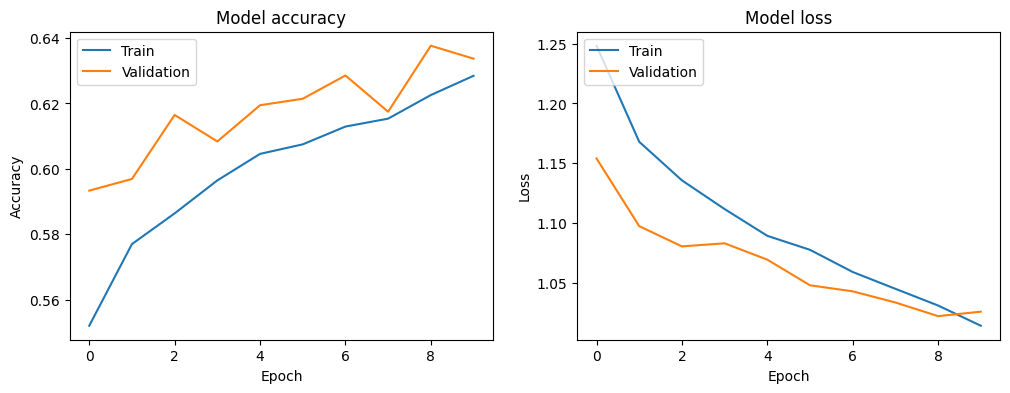

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



---



Model Fine-tuning with Optimized Parameters

In [33]:
from tensorflow.keras.models import load_model

In [34]:
model = load_model('best_model.h5')

optimizer = Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint('best_model_finetuned.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, mode='min', verbose=1)

history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


Epoch 1/3
633/633 [==============================] - ETA: 0s - loss: 0.9754 - accuracy: 0.6407
Epoch 1: val_loss improved from inf to 0.99945, saving model to best_model_finetuned.h5
633/633 [==============================] - 495s 749ms/step - loss: 0.9754 - accuracy: 0.6407 - val_loss: 0.9994 - val_accuracy: 0.6460 - lr: 1.0000e-04
Epoch 2/3
633/633 [==============================] - ETA: 0s - loss: 0.9547 - accuracy: 0.6481
Epoch 2: val_loss improved from 0.99945 to 0.99371, saving model to best_model_finetuned.h5
633/633 [==============================] - 430s 680ms/step - loss: 0.9547 - accuracy: 0.6481 - val_loss: 0.9937 - val_accuracy: 0.6491 - lr: 1.0000e-04
Epoch 3/3
633/633 [==============================] - ETA: 0s - loss: 0.9343 - accuracy: 0.6509
Epoch 3: val_loss improved from 0.99371 to 0.99231, saving model to best_model_finetuned.h5
633/633 [==============================] - 422s 667ms/step - loss: 0.9343 - accuracy: 0.6509 - val_loss: 0.9923 - val_accuracy: 0.6483 - lr

Accuracy of Fine-tuning

In [35]:
scores2 = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Accuracy: {scores2[1]*100}%")

158/158 [==============================] - 68s 429ms/step - loss: 0.9923 - accuracy: 0.6483
Accuracy: 64.83386158943176%


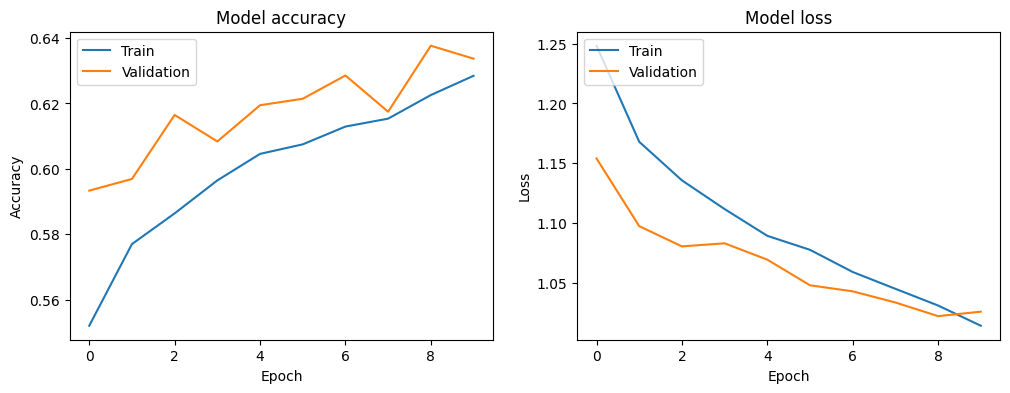

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Save model

In [37]:
model.save('/content/best_model_finetuned.h5')



---

